# **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

**import Dataset**

In [ ]:
df=pd.read_csv("/content/t20.csv")

In [ ]:
df.head()

,Date,Venue,Bat First,Bat Second,Winner
0,6/13/2005,The Rose Bowl,England,Australia,England
1,2/17/2005,Eden Park,Australia,New Zealand,Australia
2,10/21/2005,New Wanderers Stadium,South Africa,New Zealand,New Zealand
3,8/28/2006,County Ground,England,Pakistan,Pakistan
4,6/15/2006,The Rose Bowl,Sri Lanka,England,Sri Lanka


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1842 entries, 0 to 1841
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        1842 non-null   object
 1   Venue       1842 non-null   object
 2   Bat First   1842 non-null   object
 3   Bat Second  1842 non-null   object
 4   Winner      1842 non-null   object
dtypes: object(5)
memory usage: 72.1+ KB


In [ ]:
df.shape

(1842, 5)

In [ ]:
df.isnull().sum()

,0
Date,0
Venue,0
Bat First,0
Bat Second,0
Winner,0


In [ ]:
df.describe()

,Date,Venue,Bat First,Bat Second,Winner
count,1842,1842,1842,1842,1842
unique,1115,183,96,95,89
top,7/15/2022,Dubai International Cricket Stadium,Pakistan,Pakistan,Pakistan
freq,8,88,111,97,130


In [ ]:
df["Winner"].value_counts()

,count
Winner,
Pakistan,130
India,127
New Zealand,100
South Africa,92
Australia,91
England,88
Sri Lanka,75
West Indies,74
Afghanistan,69


**Label Encoder**

In [ ]:
# Encode categorical variables
le = LabelEncoder()

# Encode 'Venue', 'Bat First', 'Bat Second', 'Winner'
df['Venue'] = le.fit_transform(df['Venue'])
df['Bat First'] = le.fit_transform(df['Bat First'])
df['Bat Second'] = le.fit_transform(df['Bat Second'])
df['Winner'] = le.fit_transform(df['Winner'])

In [ ]:
df['Year'] = pd.to_datetime(df['Date']).dt.year

In [ ]:
df['Year']

,Year
0,2005
1,2005
2,2005
3,2006
4,2006
5,2006
6,2006
7,2007
8,2006
9,2006


In [ ]:
# Define features and target variable
X = df[['Venue', 'Bat First', 'Bat Second', 'Year']]
y = df['Winner']

In [ ]:
print(X)

      Venue  Bat First  Bat Second  Year
0       157         22           2  2005
1        37          2          59  2005
2       105         79          59  2005
3        30         22          63  2006
4       157         82          22  2006
...     ...        ...         ...   ...
1837     45         90          70  2023
1838     45         87          89  2023
1839     45         90          86  2023
1840     45         90          70  2023
1841     45         70          86  2023

[1842 rows x 4 columns]


In [ ]:
print(y)

0       21
1        2
2       55
3       59
4       75
        ..
1837    83
1838    83
1839    80
1840    83
1841    80
Name: Winner, Length: 1842, dtype: int64


# **Split dataset into Training and testing**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
print("Shape of X data:",X.shape)
print("Shape of X_train data",X_train.shape)
print("Shape of X_test data",X_test.shape)

Shape of X data: (1842, 4)
Shape of X_train data (1473, 4)
Shape of X_test data (369, 4)


In [ ]:
print(y_train.shape)

(1473,)


# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr=LogisticRegression()

In [ ]:
lr.fit(X_test,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**Accuracy**

In [ ]:
X_testing_prediction=lr.predict(X_test)
testing_data_accuracy=accuracy_score(y_test,X_testing_prediction)

In [ ]:
print("Accuracy of testing",testing_data_accuracy)

Accuracy of testing 0.14092140921409213


In [ ]:
X_training_prediction=lr.predict(X_train)
training_data_accuracy=accuracy_score(y_train,X_training_prediction)

In [ ]:
print("Accuracy of traning",training_data_accuracy)

Accuracy of traning 0.08486082824168364


# **RandomForest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rc=RandomForestClassifier()

In [ ]:
rc.fit(X_test,y_test)

RandomForestClassifier()

**Accuracy**

In [ ]:
X_testing_prediction=rc.predict(X_test)
rc_testing_data_accuracy=accuracy_score(y_test,X_testing_prediction)

In [ ]:
print("Accuracy of testing",rc_testing_data_accuracy)

Accuracy of testing 0.986449864498645


In [ ]:
X_training_prediction=rc.predict(X_train)
rc_training_data_accuracy=accuracy_score(y_train,X_training_prediction)

In [ ]:
print("Accuracy of traning",rc_training_data_accuracy)

Accuracy of traning 0.35980991174473864


# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier()

In [ ]:
knn.fit(X_test,y_test)

KNeighborsClassifier()

**Accuracy**

In [ ]:
X_testing_prediction=knn.predict(X_test)
knn_testing_data_accuracy=accuracy_score(y_test,X_testing_prediction)

In [ ]:
print("Accuracy of testing",knn_testing_data_accuracy)

Accuracy of testing 0.3712737127371274


In [ ]:
X_training_prediction=knn.predict(X_train)
knn_training_data_accuracy=accuracy_score(y_train,X_training_prediction)

In [ ]:
print("Accuracy of training",knn_training_data_accuracy)

Accuracy of training 0.12423625254582485


# **Naive Biyas**

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
nb=MultinomialNB()

In [ ]:
nb.fit(X_test,y_test)

MultinomialNB()

**Accuracy**

In [ ]:
X_testing_prediction=nb.predict(X_test)
nb_testing_data_accuracy=accuracy_score(y_test,X_testing_prediction)

In [ ]:
print("Accuracy of testing :",nb_testing_data_accuracy)

Accuracy of testing : 0.13008130081300814


In [ ]:
X_training_prediction=nb.predict(X_train)
nb_training_data_accuracy=accuracy_score(y_train,X_training_prediction)

In [ ]:
print("Accuracy of training :",nb_training_data_accuracy)

Accuracy of training : 0.04752206381534284


# **Suport Vector Machine**

In [ ]:
from sklearn.svm import SVC

In [ ]:
model=SVC()

In [ ]:
model.fit(X_test,y_test)

SVC()

**Accuracy**

In [ ]:
X_testing_prediction=model.predict(X_test)
svc_testing_data_accuracy=accuracy_score(y_test,X_testing_prediction)

In [ ]:
print("Testing Accuracy:",svc_testing_data_accuracy)

Testing Accuracy: 0.0921409214092141


In [ ]:
X_training_prediction=model.predict(X_train)
svc_training_data_accuracy=accuracy_score(y_train,X_training_prediction)

In [ ]:
print("Training Accuracy:",svc_training_data_accuracy)

Training Accuracy: 0.06517311608961303


# **DecisionTree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc=DecisionTreeClassifier()

In [ ]:
dtc.fit(X_test,y_test)

DecisionTreeClassifier()

**Accuracy**

In [ ]:
X_testing_prediction=dtc.predict(X_test)
dtc_testing_data_accuracy=accuracy_score(y_test,X_testing_prediction)

In [ ]:
print("Accuracy Score of testing",dtc_testing_data_accuracy)

Accuracy Score of testing 0.986449864498645


In [ ]:
X_training_prediction=dtc.predict(X_train)
dtc_training_data_accuracy=accuracy_score(y_train,X_training_prediction)

In [ ]:
print("Accuracy Score of training",dtc_training_data_accuracy)

Accuracy Score of training 0.31568228105906315


# **LGBMClassifier**

In [ ]:
!pip install xgboost lightgbm catboost

In [ ]:
import lightgbm as lgb
from catboost import CatBoostClassifier

In [ ]:
lgb_model = lgb.LGBMClassifier()

In [ ]:
lgb_model.fit(X_test, y_test)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

LGBMClassifier()

**Accuracy**

In [ ]:
X_testing_prediction=lgb_model.predict(X_test)
lg_testing_data_accuracy=accuracy_score(y_test,X_testing_prediction)

In [ ]:
print("Accuracy of testing data:",lg_testing_data_accuracy)

Accuracy of testing data: 0.986449864498645


In [ ]:
X_training_prediction=lgb_model.predict(X_train)
lg_training_data_accuracy=accuracy_score(y_train,X_training_prediction)

# **Catboost Model**

In [ ]:
cat_model = CatBoostClassifier(silent=True)

In [ ]:
cat_model.fit(X_test, y_test)

**Accuracy**

In [ ]:
cat_predictions = cat_model.predict(X_test)
cat_accuracy = accuracy_score(y_test, cat_predictions)
print(f'CatBoost Accuracy: {cat_accuracy:.2f}')

CatBoost Accuracy: 0.99


In [ ]:
cat_predictions = cat_model.predict(X_train)
cat_accuracy = accuracy_score(y_train, cat_predictions)
print(f'CatBoost Accuracy: {cat_accuracy:.2f}')

CatBoost Accuracy: 0.30


# **SGD Classifier**

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
sgd_model = SGDClassifier(random_state=42)

In [ ]:
sgd_model.fit(X_test, y_test)

SGDClassifier(random_state=42)

**Accuracy**

In [ ]:
# Predict the outcomes on the test set
sgd_predictions = sgd_model.predict(X_test)

In [ ]:
# Evaluate the accuracy of the model
sgd_accuracy = accuracy_score(y_test, sgd_predictions)
print(f'SGDClassifier Accuracy: {sgd_accuracy:.2f}')

SGDClassifier Accuracy: 0.01


In [ ]:
# Predict the outcomes on the test set
sgd_predictions = sgd_model.predict(X_train)

In [ ]:
# Evaluate the accuracy of the model
sgd_accuracy = accuracy_score(y_train, sgd_predictions)
print(f'SGDClassifier Accuracy: {sgd_accuracy:.2f}')

SGDClassifier Accuracy: 0.01


In [ ]:
# Create a dictionary with the data
accuracy_data = {
    'Model': [
        'LogisticRegression', 'RandomForestClassifier', 'KNeighborsClassifier',
        'MultinomialNB', 'SVC', 'DecisionTreeClassifier', 'LGBMClassifier',
        'CatBoostClassifier', 'SGDClassifier'
    ],
    'Testing Accuracy': [
        testing_data_accuracy, rc_testing_data_accuracy, knn_testing_data_accuracy,
        nb_testing_data_accuracy, svc_testing_data_accuracy, dtc_testing_data_accuracy,
        lg_testing_data_accuracy, cat_accuracy, sgd_accuracy
    ],
    'Training Accuracy': [
        training_data_accuracy, rc_training_data_accuracy, knn_training_data_accuracy,
        nb_training_data_accuracy, svc_testing_data_accuracy, dtc_training_data_accuracy,
        lg_training_data_accuracy, cat_accuracy, sgd_accuracy
    ]
}

# Create the DataFrame
accuracy_df = pd.DataFrame(accuracy_data)

# Print the DataFrame
print(accuracy_df)

                    Model  Testing Accuracy  Training Accuracy
0      LogisticRegression          0.140921           0.084861
1  RandomForestClassifier          0.986450           0.359810
2    KNeighborsClassifier          0.371274           0.124236
3           MultinomialNB          0.130081           0.047522
4                     SVC          0.092141           0.092141
5  DecisionTreeClassifier          0.986450           0.315682
6          LGBMClassifier          0.986450           0.466395
7      CatBoostClassifier          0.299389           0.299389
8           SGDClassifier          0.005431           0.005431


In [ ]:
import matplotlib.pyplot as plt

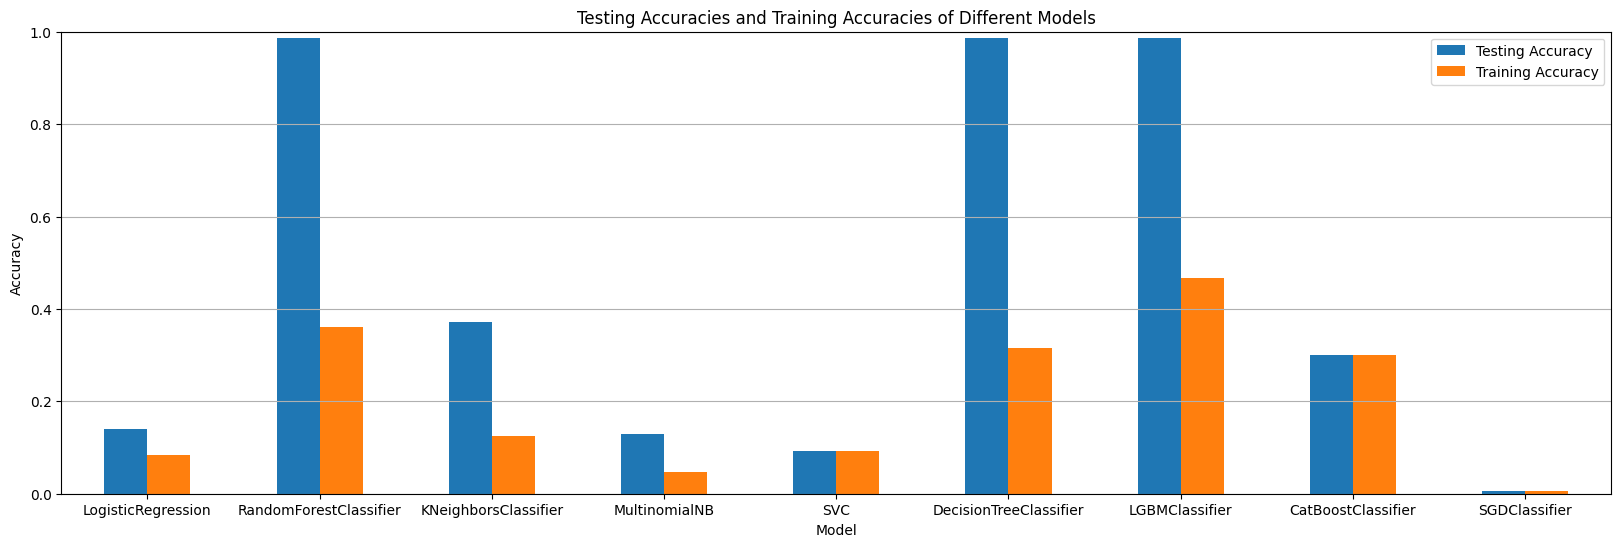

In [ ]:
# Plot the accuracies
accuracy_df.plot(x='Model', y=['Testing Accuracy',"Training Accuracy"], kind='bar', figsize=(20, 6))
plt.title('Testing Accuracies and Training Accuracies of Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.xticks(rotation=0)
plt.legend(loc='best')
plt.grid(axis='y')

plt.show()

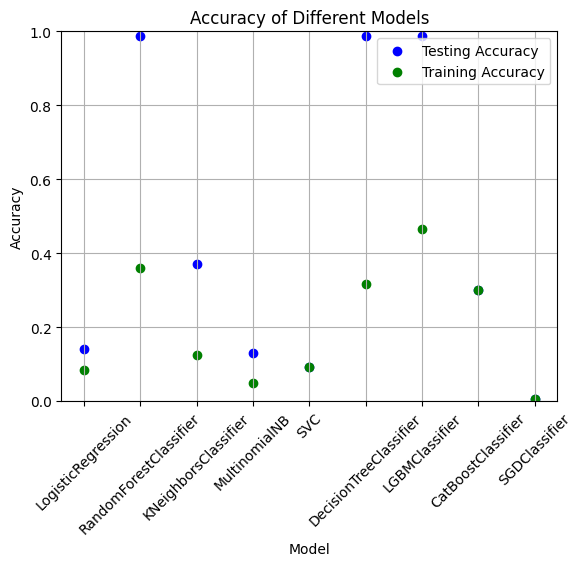

In [ ]:
plt.scatter(accuracy_df['Model'], accuracy_df['Testing Accuracy'], color='blue', label='Testing Accuracy')
plt.scatter(accuracy_df['Model'], accuracy_df['Training Accuracy'], color='green', label='Training Accuracy')
plt.title('Accuracy of Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.grid(True)
plt.show()